## Check GPU allocation
If "Found GPU at: / device: GPU: 0" is displayed, the GPU is ready to use.

In [1]:
%tensorflow_version 1.13.1
import glob
from google.colab import files
from IPython.display import Image
import tensorflow
print(tensorflow.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.13.1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


## Git Clone the donkey repository

In [2]:
!git clone https://github.com/juan-ivan-NV/autonomous-ai-mini-vehicle


Cloning into 'autonomous-ai-mini-vehicle'...
remote: Enumerating objects: 17722, done.
remote: Counting objects: 100% (17722/17722), done.
remote: Compressing objects: 100% (12674/12674), done.
remote: Total 17722 (delta 5766), reused 16930 (delta 4976), pack-reused 0
Receiving objects: 100% (17722/17722), 163.00 MiB | 25.02 MiB/s, done.
Resolving deltas: 100% (5766/5766), done.
Checking out files: 100% (9485/9485), done.


In [3]:
%cd /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master
!git checkout master

/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master
Already on 'master'
Your branch is up to date with 'origin/master'.


## Install donkey car


In [4]:
!pip3 install -e .[pc]

Obtaining file:///content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master
     |████████████████████████████████| 99 kB 4.0 MB/s 
     |████████████████████████████████| 865 kB 36.0 MB/s 
     |████████████████████████████████| 29.5 MB 324 kB/s 
  Created wheel for Kivy-Garden: filename=Kivy_Garden-0.1.4-py3-none-any.whl size=4531 sha256=2e6e0e4c29495b62750b49eba8efa657bde83371986a783073f91b96298e9a07
  Stored in directory: /root/.cache/pip/wheels/3f/43/e3/50289d555356f0421d1c388c82d052d5788f22a34d0cd8659d
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62133 sha256=805caa5b87d279311aa149d55e84bb9b34dee655a729a1033ceca7971bcd5948
  Stored in directory: /root/.cache/pip/wheels/d0/bf/ac/2b3f43f8c6fcd0f4ba5395397458c521eb0b52d33b574a5a40
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9632 sha256=2f096ecad43fb454b65b0f34e272769e81d81111dd20d716305e55423b969c96
  Stored in directory: /root/.cache/pip/wheels/

# Step 2: Supply Data
In order to train the neural network we need to supply trainings data which are recorded on the raspi during driving the donkeycar on the track

In [5]:
%cd /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/data
!unzip tub_36_19-04-13.zip

Streaming output truncated to the last 5000 lines.
  inflating: tub_36_19-04-13/5509_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/552_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5584_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5622_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5639_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5684_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5709_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5723_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5748_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5757_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5769_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/581_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5828_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5836_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5850_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5855_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5858_cam-i

# Step 4: Train your model
<a id='train_model'></a>
There are several types of modes available:

 - linear
 - categorical
 - rnn
 - imu
 - behavior
 - 3d
 - localizer  
 And you can use pre-trained models by adding a flag
- `[--transfer=<model>]`

In [9]:
#!python /content/mycar/manage.py train --type linear --model /content/mycar/models/mypilot.h5
#!python /content/mycar/train.py --type linear --model /content/mycar/models/mypilot.h5
!python /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/train.py --tub '/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/data/*' --model /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/models/model5.tflite
#!donkey contrain --tub /content/mycar1//data/tub_36_19-04-13 --model /content/mycar1/models/mypilot.h5

using donkey v3.1.1 ...
loading config file: /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/config.py
loading personal config over-rides

config loaded
Traceback (most recent call last):
  File "/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/train.py", line 1090, in <module>
    multi_train(cfg, dirs, model, transfer, model_type, continuous, aug)
  File "/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/train.py", line 956, in multi_train
    train_fn(cfg, tub, model, transfer, model_type, continuous, aug)
  File "/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/train.py", line 300, in train
    raise Exception("Model filename should end with .h5")
Exception: Model filename should end with .h5


## Plot loss curve of model
The curve should show smaller loss vs epochs and the train and validation loss should not differ too much. 
>  Tip: If train loss is much smaller than validation loss your model might be overfitting.


/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/models


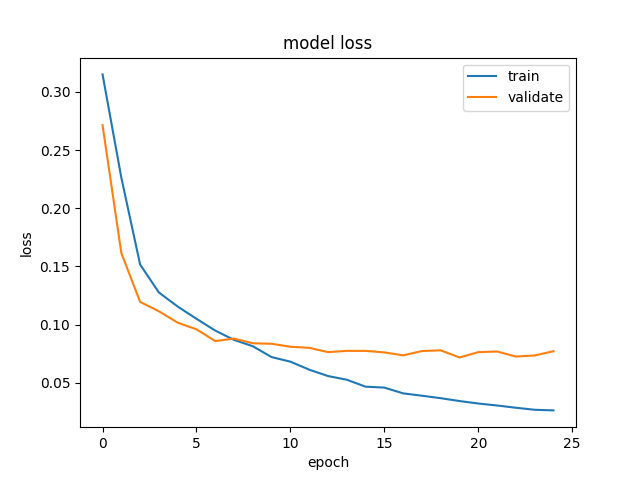

In [7]:
%cd /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/models
file = glob.glob("*.png")
Image(file[0])

In [8]:
%ls

config.py  model4.h5_loss_acc_0.071716.png  mypilot1.h5_loss_acc_1.889308.png
model4.h5  mypilot1.h5                      mypilot.h5


In [10]:
files.download('model4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>